In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD')
# If you already have the csv file downloaded, replace the above code with: 
    # df = pd.read_csv(<PATH_TO_CSV>)


/home/harry/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Rename columns for ease of visibility
renames = {'Black, Non-Hispanic': 'Black', 'White, Non-Hispanic': 'White', 'Hispanic/Latino': 'Hispanic',
           'Asian, Non-Hispanic': 'Asian', 'Multiple/Other, Non-Hispanic':'Other', 
           'American Indian/Alaska Native, Non-Hispanic': 'Native', 
           'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 'Pacific Islander'}
for key in renames.keys():
    df = df.replace(key, renames[key])
df

cdc_report_dt pos_spec_dt    onset_dt             current_status  \
0          2020/11/10  2020/11/10         NaN  Laboratory-confirmed case   
1          2020/11/14  2020/11/10  2020/11/10  Laboratory-confirmed case   
2          2020/11/19  2020/11/10  2020/11/09  Laboratory-confirmed case   
3          2020/11/14  2020/11/10         NaN  Laboratory-confirmed case   
4          2020/11/13  2020/11/10  2020/11/10  Laboratory-confirmed case   
...               ...         ...         ...                        ...   
8405074    2020/10/22         NaN         NaN              Probable Case   
8405075    2020/10/25         NaN         NaN  Laboratory-confirmed case   
8405076    2020/07/18         NaN         NaN  Laboratory-confirmed case   
8405077    2020/11/19         NaN         NaN  Laboratory-confirmed case   
8405078    2020/11/03         NaN         NaN  Laboratory-confirmed case   

             sex      age_group Race and ethnicity (combined)  hosp_yn  \
0           Male  10 - 19 Years                         Black       No   
1           Male  10 - 19 Years                         Black       No   
2           Male  10 - 19 Years                         Black       No   
3           Male  10 - 19 Years                         Black  Missing   
4           Male  10 - 19 Years                         Black       No   
...          ...            ...                           ...      ...   
8405074  Missing  30 - 39 Years                       Unknown       No   
8405075  Missing  30 - 39 Years                       Unknown  Missing   
8405076  Missing  30 - 39 Years                       Unknown  Missing   
8405077  Missing  30 - 39 Years                       Unknown  Missing   
8405078  Missing  30 - 39 Years                       Unknown       No   

          icu_yn death_yn medcond_yn  
0        Unknown       No         No  
1             No       No         No  
2             No       No         No  
3        Missing       No    Missing  
4             No       No        Yes  
...          ...      ...        ...  
8405074  Unknown       No    Missing  
8405075  Missing  Missing    Missing  
8405076  Missing  Missing    Missing  
8405077  Missing  Missing    Missing  
8405078  Unknown       No    Missing  

[8405079 rows x 11 columns]

In [5]:
# Extract month from date
def getMonth(date):
    return date[5:7]
df['month'] = df['cdc_report_dt'].apply(getMonth)


In [6]:
# Get rid of missing and unknown data
df = df.replace(['Missing', 'Unknown'], np.nan) #no interest in these rows
df = df.replace('No', 0)
df = df.replace('Yes', 1)

df = df.replace('Male', 1)
df = df.replace('Female', 0)

df['sex'] = df['sex'].replace('Other', np.nan) #Negligle - only like 30 people are "other" in this dataset

#We don't mind keeping nan values for date data, 
#so we need to replace nan with something that won't be dropped by dropna
df['pos_spec_dt'] = df['pos_spec_dt'].replace(np.nan, '--')
df['onset_dt'] = df['onset_dt'].replace(np.nan, '--')
dropped = df.dropna()
df

# We still have almost half a million rows that have every single one of our desired datapoints

cdc_report_dt pos_spec_dt    onset_dt             current_status  sex  \
0          2020/11/10  2020/11/10          --  Laboratory-confirmed case  1.0   
1          2020/11/14  2020/11/10  2020/11/10  Laboratory-confirmed case  1.0   
2          2020/11/19  2020/11/10  2020/11/09  Laboratory-confirmed case  1.0   
3          2020/11/14  2020/11/10          --  Laboratory-confirmed case  1.0   
4          2020/11/13  2020/11/10  2020/11/10  Laboratory-confirmed case  1.0   
...               ...         ...         ...                        ...  ...   
8405074    2020/10/22          --          --              Probable Case  NaN   
8405075    2020/10/25          --          --  Laboratory-confirmed case  NaN   
8405076    2020/07/18          --          --  Laboratory-confirmed case  NaN   
8405077    2020/11/19          --          --  Laboratory-confirmed case  NaN   
8405078    2020/11/03          --          --  Laboratory-confirmed case  NaN   

             age_group Race and ethnicity (combined)  hosp_yn  icu_yn  \
0        10 - 19 Years                         Black      0.0     NaN   
1        10 - 19 Years                         Black      0.0     0.0   
2        10 - 19 Years                         Black      0.0     0.0   
3        10 - 19 Years                         Black      NaN     NaN   
4        10 - 19 Years                         Black      0.0     0.0   
...                ...                           ...      ...     ...   
8405074  30 - 39 Years                           NaN      0.0     NaN   
8405075  30 - 39 Years                           NaN      NaN     NaN   
8405076  30 - 39 Years                           NaN      NaN     NaN   
8405077  30 - 39 Years                           NaN      NaN     NaN   
8405078  30 - 39 Years                           NaN      0.0     NaN   

         death_yn  medcond_yn month  
0             0.0         0.0    11  
1             0.0         0.0    11  
2             0.0         0.0    11  
3             0.0         NaN    11  
4             0.0         1.0    11  
...           ...         ...   ...  
8405074       0.0         NaN    10  
8405075       NaN         NaN    10  
8405076       NaN         NaN    07  
8405077       NaN         NaN    11  
8405078       0.0         NaN    11  

[8405079 rows x 12 columns]

In [7]:
# Save clean dataframe
dropped.to_csv('../Data/clean_data.csv', index=False)

## Have we introduced bias into our sample?
We have cut down our sample size by more than 90%. Thankfully, even when we're extremely picky, and we don't allow for *any* datapoints to be missing (convenient for quantitative analysis), we still have almost half a *million* cases of Covid-19 to examine.

Thanks to the CDC's huge amount of data collected, we can prune down the data, and we still have 10x the sample size that Pfizer had for its phase 3 Covid vaccine trials (which just got approved

So, we don't have to worry about whether or not we have removed *too much* of the dataset, but we do have to worry about the possibility of bias. Did we remove rows randomly, or did we introduce bias? 

---
## Random selection
To understand why the question of randomness is so important, think of a simple example: You have a dataset of one billion men, sampled from the globe at random. The two columns of information are height and nationality. You find that the average height for men is 176.5 cm. Now, think of three distinct scenarios:

Scenario 1: You RANDOMLY select 1000 (0.1%) of the men. Do you think the average height will still be 176.5 cm?

Scenario 2: You select 1000 men, but you make sure they are ALL from the country of Norway (an especially tall country). Now, do you think the new average will reflect the global average?

Scenario 3: You select 1000 men, but you make sure that you ONLY select men who wore red hats today. Now, do you think the new average will reflect the global average?

Both scenario 2 and 3 are highly UN-random, but only one is a biased sample of height. The sample average height for scenario 3 should yield the same value as the global population average. This is because nationality correlates with height, and the wearing of red hats does not.

---
## CDC Data
This is the question we need to be asking ourselves: Is our selection criteria (the full availability of hospital data) correlated with our dependent variable (death)?
When we drop these 7.5 million incomplete rows, is it more akin to the nationality example, or the red hats example?

We can explore this question intuitively and quantitatively. Intuitively, I would make the argument that there is unlikely to be any correlation between a hospital's data-reporting and its patient outcomes. I imagine that the staff who generate these datasets are not doctors, and the quality of their work does not reflect the quality of the medical work at these hospitals. I would assume based on intuition that the quality of medical care and the quality of reported data are completely independent of one another. 

One great way to look for bias is to visualize the distribution of population fields. In this case, intuition prevails. The distributions are nearly identical after performing the data pruning.

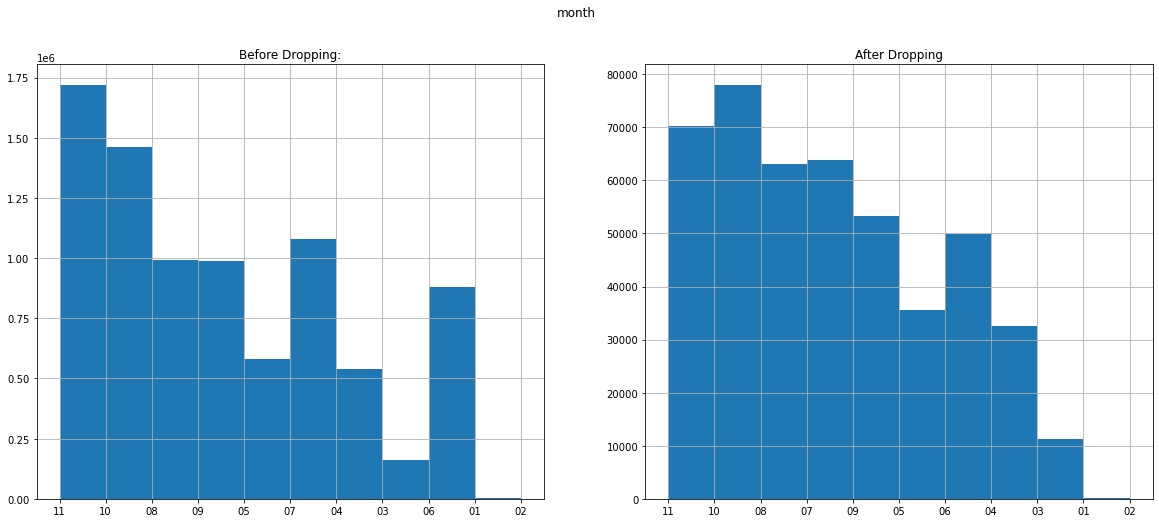

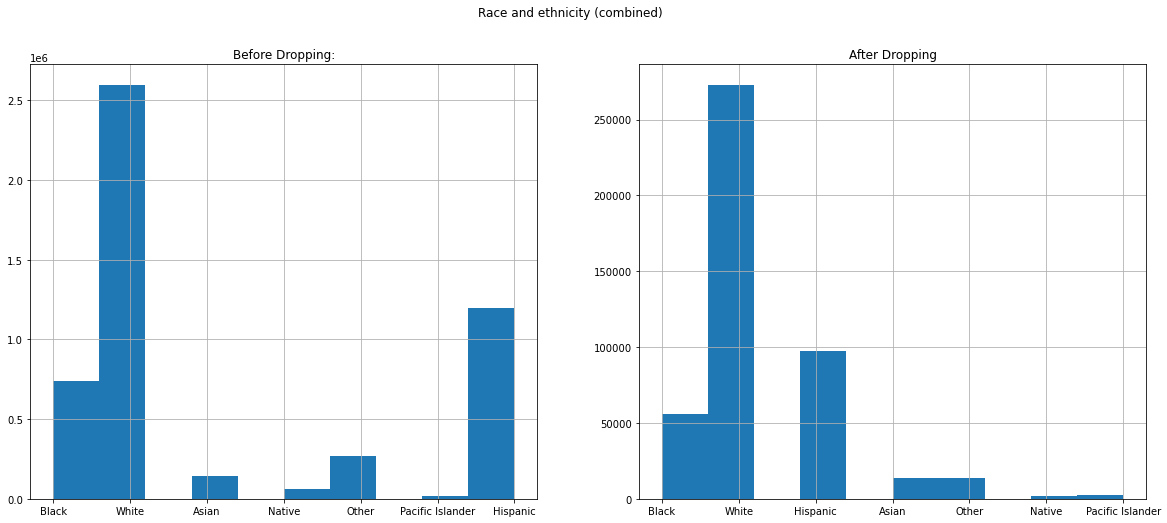

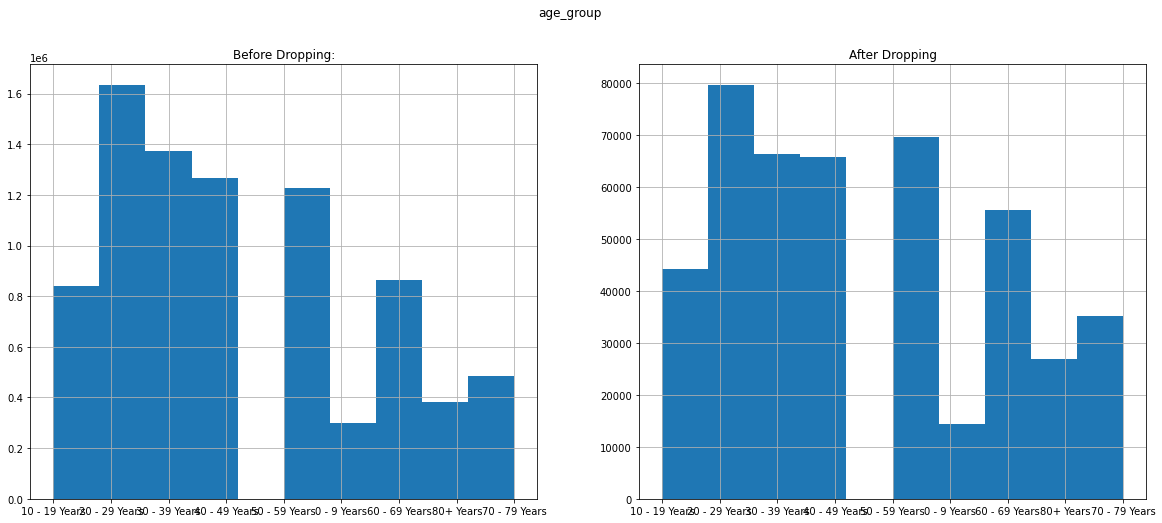

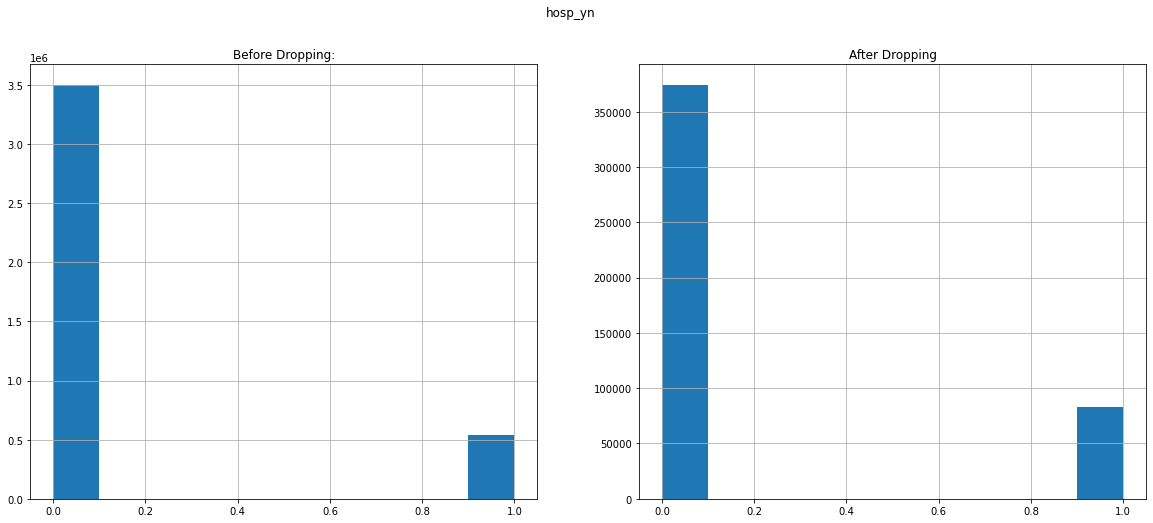

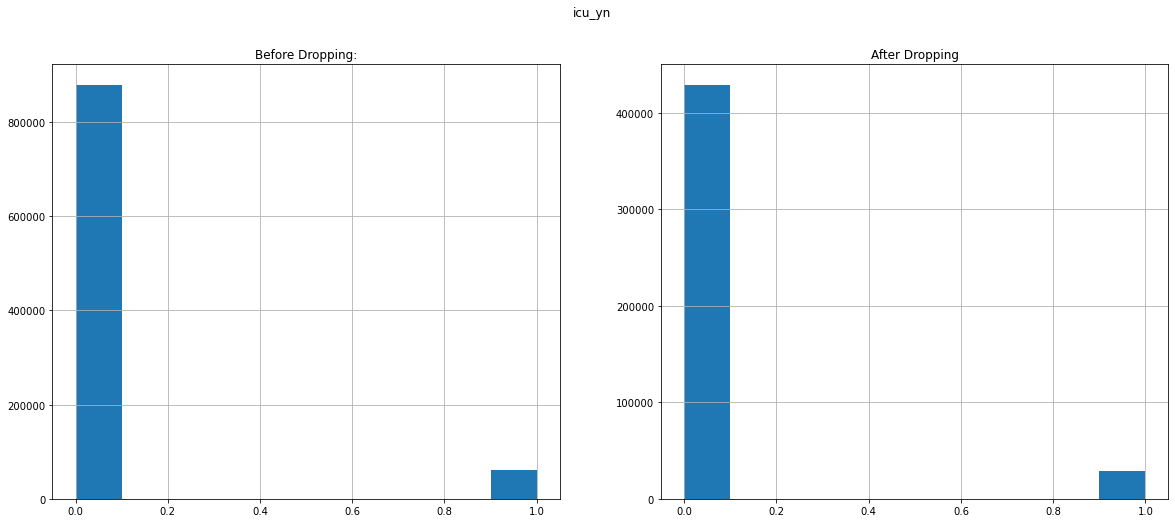

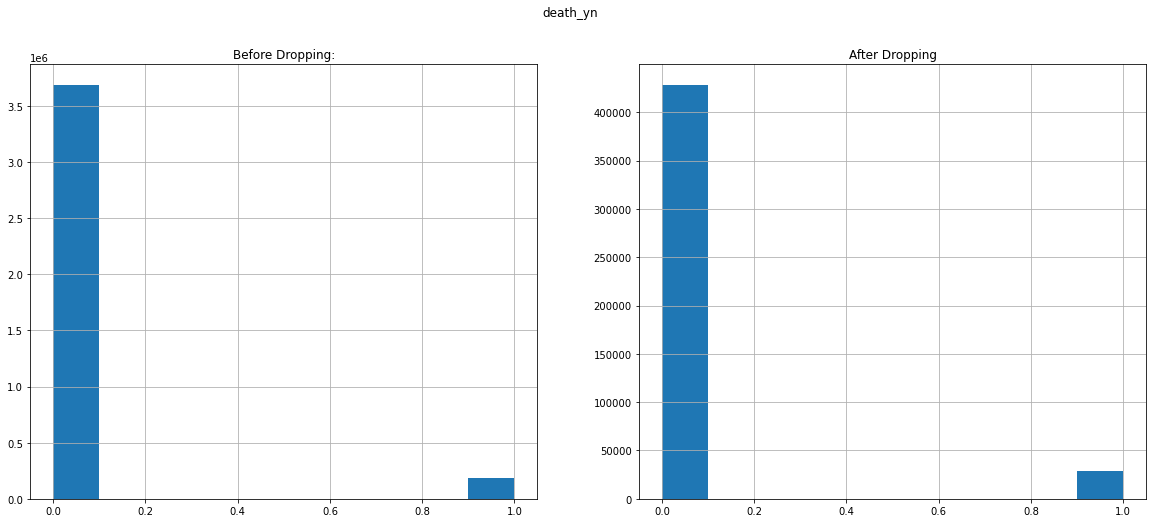

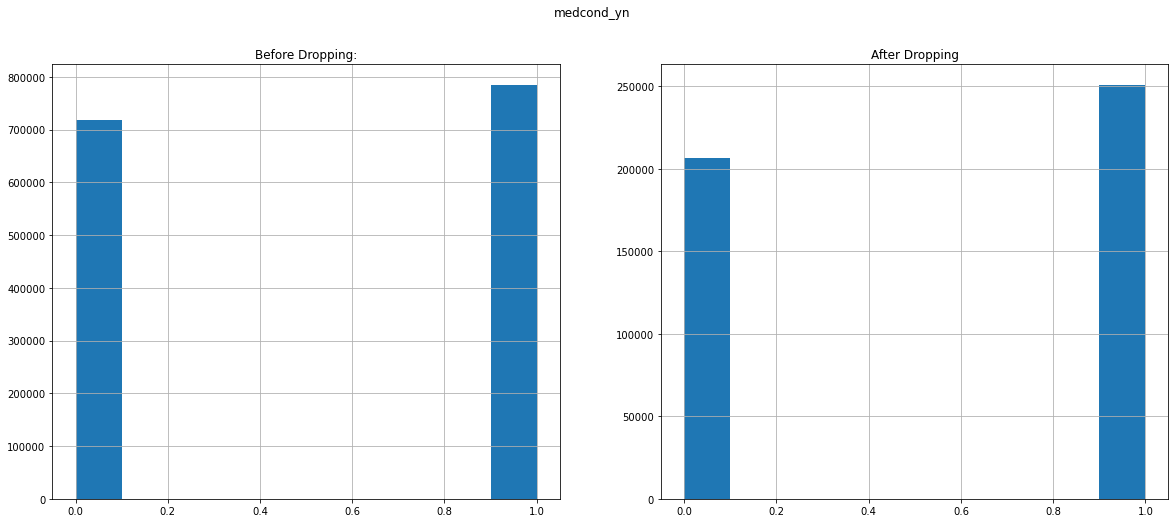

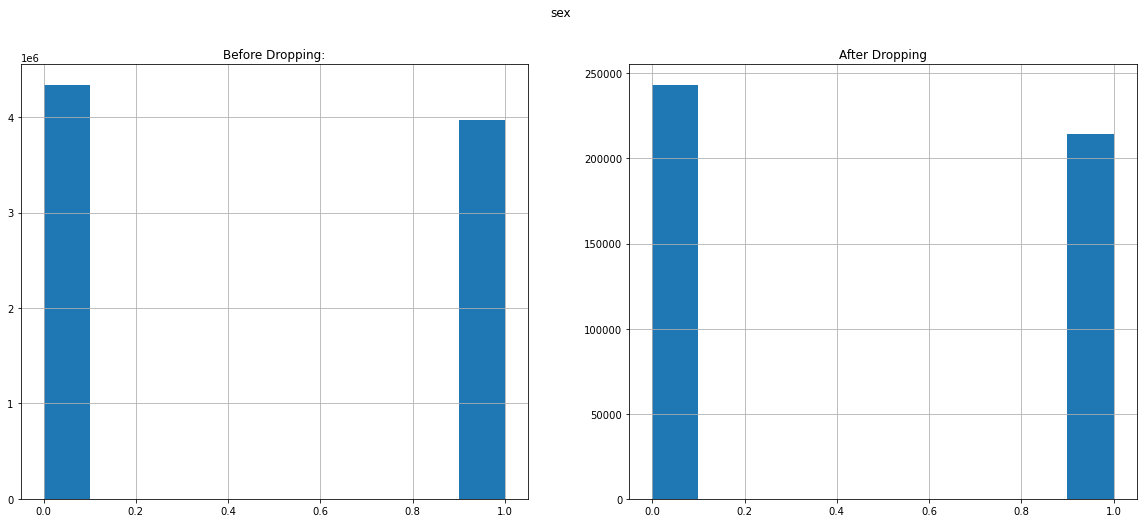

In [8]:
#Generate a histogram of the two dataframes - one with dropped values, the other without
def compareHistogram(col):
    fig, axs = plt.subplots(1,2, figsize= (20,8))
    fig.suptitle(col)
    
    df[col].hist(ax = axs[0])
    axs[0].set_title('Before Dropping:')

    dropped[col].hist(ax = axs[1])
    axs[1].set_title('After Dropping')
    plt.savefig('../Images/drop_data_comparisons/' + col + '.png', facecolor = 'white')

    
for column in ['month','Race and ethnicity (combined)', 'age_group', 'hosp_yn','icu_yn','death_yn','medcond_yn', 'sex']:
    compareHistogram(column)